First of all, we import some usefull libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.integrate import quad, dblquad
from mpl_toolkits.mplot3d import Axes3D
import time as time

We initializate the temporary counter and define next parameters.

In [2]:
t0 = time.perf_counter()
s = -25.
n = 6
a = 10

_type_ = 'Real'
_grid_ = 'Rectangular'

We define next bessel functions, as well as some initial ranges and parameters.

In [3]:
# Complexo.
u_complex = np.array([0.5967, 1.7837, 3.6420, 4.3039, 5.2119])
v_complex = np.array([0.5225, 0.5268, 0, 0, 0])

# Real.
u_real = np.array([1.0225, 3.0445, 5.4319, 6.1570, 7.1293])
v_real = np.array([1.1424, 1.0829, 0, 0, 0])

def _complex_(u, Phi):
    while np.abs(Phi) > np.pi / 4:
        if Phi > np.pi / 4:
            Phi -= np.pi / 2
        else:
            Phi += np.pi / 2
    
    u = u * np.cos(Phi)
    h_1 = 1; h_2 = 1; h_f = 1
    
    for j in np.arange(0, n - 1):
        h_1 *= u_complex[j]**4 + v_complex[j]**4 + u**4 + 2 * u_complex[j]**2 * v_complex[j]**2 + 2 * u**2 * (v_complex[j]**2 - u_complex[j]**2)
        h_2 *= u_complex[j]**2 + v_complex[j]**2
        h_f *= 1 - (u / zeros[j])**2
        
    return (2 * sc.special.j1(np.pi * u) / (h_f * np.pi * u))**2 * h_1 / h_2**2

def _real_(u, Phi):
    while np.abs(Phi) > np.pi / 4:
        if Phi > np.pi / 4:
            Phi -= np.pi / 2
        else:
            Phi += np.pi / 2
    
    u = u * np.cos(Phi)
    h_1 = 1; h_2 = 1; h_f = 1
    M = np.count_nonzero(v_real)
    
    for j in np.arange(0, M):
        h_1 *= u_real[j]**4 + v_real[j]**4 + u**4 + 2 * u_real[j]**2 * v_real[j]**2 + 2 * u**2 * (v_real[j]**2 - u_real[j]**2)
        h_2 *= u_real[j]**2 + v_real[j]**2
    
    for j in np.arange(M, n - 1):
        h_1 *= u_real[j]**2 - u**2
        h_2 *= u_real[j]**2
    
    for j in np.arange(0, n + M - 1):
        h_f *= 1 - (u / zeros[j])**2
        
    return ((2 * sc.special.j1(np.pi * u) * h_1) / (h_f * h_2 * np.pi * u))**2

if _type_ == 'Real':
    function_type = _real_
    _type_ = '_real_'
    
elif _type_ == 'Complex':
    function_type = _complex_
    _type_ = '_complex_'

In [4]:
def pass_to_dB(function):
    return 10 * np.log10(function / np.max(function))

def clear_around(function):
    #function[np.where(r > np.pi / 2)] = - 50
    function[np.where(function < - 50)] = - 50

def degrees(angle):
    return 180 * angle / np.pi

def radians(angle):
    return np.pi * angle / 180

rho_a = np.arange(0, 1, 0.001)
rho_a = np.delete(rho_a, 0)

c = np.arange(0, 10, 0.01)
c = np.delete(c, 0)

zeros = sc.special.jn_zeros(1, n + 5) / np.pi

In [5]:
complex_roots = np.zeros(len(c))
real_roots = np.zeros(len(c))

for i in range(len(c)):
    complex_roots[i] = np.abs(_complex_(c[i], 0))
    real_roots[i] = np.abs(_real_(c[i], 0))

complex_roots = pass_to_dB(complex_roots)
real_roots = pass_to_dB(real_roots)

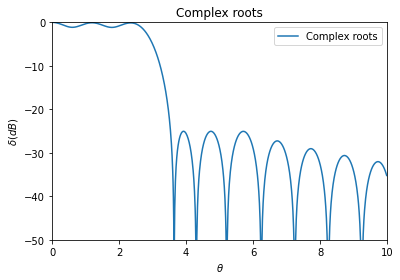

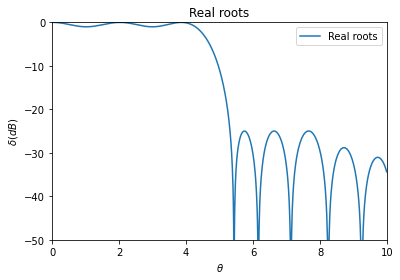

In [6]:
plt.figure(1)
plt.plot(c, complex_roots, label = u'Complex roots')
plt.title('Complex roots')
plt.legend(loc = 'upper right')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\delta (dB)$')
plt.xlim(0, 10)
plt.ylim(-50, 0)
#plt.savefig('1D_complex_pattern.png', dpi = 300)

plt.figure(2)
plt.plot(c, real_roots, label = u'Real roots')
plt.title('Real roots')
plt.legend(loc = 'upper right')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\delta (dB)$')
plt.xlim(0, 10)
plt.ylim(-50, 0)
#plt.savefig('1D_real_pattern.png', dpi = 300)
plt.show()

## 3D plotting

Redefinimos as funcións, pois deste xeito o 3D faise máis rápido.

In [7]:
def delta_complex_roots_3D(Theta, Phi):
    while np.count_nonzero(np.abs(Phi) > np.pi / 4) != 0:
            Phi[np.where(Phi > np.pi / 4)] -= np.pi / 2
            Phi[np.where(Phi < - np.pi / 4)] += np.pi / 2
            
    u = 2 * a * np.sin(Theta) * np.cos(Phi)
    h_1 = 1; h_2 = 1; h_f = 1
    
    for j in np.arange(0, n - 1):
        h_1 *= u_complex[j]**4 + v_complex[j]**4 + u**4 + 2 * u_complex[j]**2 * v_complex[j]**2 + 2 * u**2 * (v_complex[j]**2 - u_complex[j]**2)
        h_2 *= u_complex[j]**2 + v_complex[j]**2
        h_f *= 1 - (u / zeros[j])**2
        
    return (2 * sc.special.j1(np.pi * u) / (h_f * np.pi * u))**2 * h_1 / h_2**2

def delta_real_roots_3D(Theta, Phi):
    while np.count_nonzero(np.abs(Phi) > np.pi / 4) != 0:
            Phi[np.where(Phi > np.pi / 4)] -= np.pi / 2
            Phi[np.where(Phi < - np.pi / 4)] += np.pi / 2
            
    u = 2 * a * np.sin(Theta) * np.cos(Phi)
    h_1 = 1; h_2 = 1; h_f = 1
    M = np.count_nonzero(v_real)
    
    for j in np.arange(0, M):
        h_1 *= u_real[j]**4 + v_real[j]**4 + u**4 + 2 * u_real[j]**2 * v_real[j]**2 + 2 * u**2 * (v_real[j]**2 - u_real[j]**2)
        h_2 *= u_real[j]**2 + v_real[j]**2
    
    for j in np.arange(M, n - 1):
        h_1 *= u_real[j]**2 - u**2
        h_2 *= u_real[j]**2
    
    for j in np.arange(0, n + M - 1):
        h_f *= 1 - (u / zeros[j])**2
        
    return ((2 * sc.special.j1(np.pi * u) * h_1) / (h_f * h_2 * np.pi * u))**2

Sacamos os diagramas en 3D.

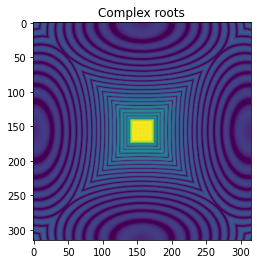

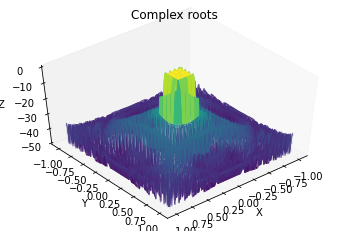

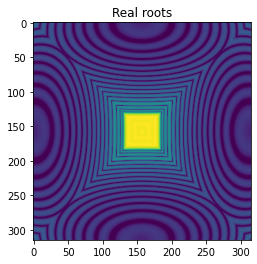

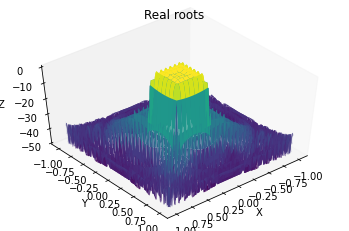

In [8]:
x = np.arange(- np.pi / 2, np.pi / 2, 0.01); x = np.delete(x, np.where(x == 0))
X, Y = np.meshgrid(x, x)

X_plot = np.sin(X)
Y_plot = np.sin(Y)

N = len(x)
N_square = N * N

theta = np.sqrt(X**2 + Y**2)
phi = np.arctan2(Y, X)

Theta = np.reshape(theta, (N_square))
Phi = np.reshape(phi, (N_square))

def plot_3D(function, _type_):
    Z_plot = np.abs(function(Theta, Phi))
    Z_plot = pass_to_dB(Z_plot)
    clear_around(Z_plot)
    Z_plot = np.reshape(Z_plot, (N, N))
    #np.savetxt('Original_Z.txt', Z_plot)
    
    plt.imshow(Z_plot)
    plt.title(_type_ + ' roots')
    #plt.savefig('Horizontal_' + _type_ + '_cut.png', dpi = 300)
    plt.show()
    
    ax = plt.axes(projection = '3d')
    ax.plot_surface(X_plot, Y_plot, Z_plot, cmap = 'viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.grid(False)
    ax.set_visible(True)
    ax.set_zlim(-50, 0)
    plt.title(_type_ +' roots')
    #plt.savefig('3D_' + _type_ + '_pattern.png', dpi = 300)
    ax.view_init(50, 50)
    plt.show()

plot_3D(delta_complex_roots_3D, 'Complex')
plot_3D(delta_real_roots_3D, 'Real')

Comprobamos que nos saca ben os cortes a diferentes ángulos $\phi$.

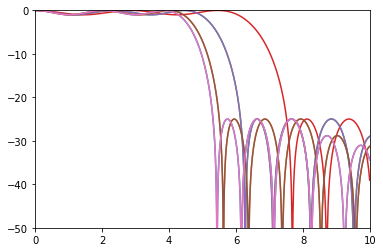

In [9]:
def plot(phi):
    F0 = np.abs(function_type(c, phi))
    F0 = pass_to_dB(F0)
    plt.plot(c, F0)
    plt.ylim(-50, 0)
    plt.xlim(0, 10)
    #plt.show()

plot(0)
plot(radians(15))
plot(radians(30))
plot(radians(45))
plot(radians(60))
plot(radians(75))
plot(radians(90))

## Calculamos $F_k(u)$

In [10]:
def F_k(k, u):
    def integral_function(phi): return function_type(u, phi) * np.exp(- 1j * k * phi)
    def real_integral_function(phi): return np.real(integral_function(phi))
    def imaginary_integral_function(phi): return np.imag(integral_function(phi))

    real_integral = quad(real_integral_function, -np.pi, np.pi, limit=50000)
    imag_integral = quad(imaginary_integral_function, -np.pi, np.pi, limit=50000)
    
    return 0.5 * (real_integral[0] + 1j*imag_integral[0]) / np.pi

Podemos gardar os cálculos xa feitos en documentos, pois estos se repiten e así aforramos logo tempo.

In [11]:
Table_1 = False

if Table_1:
    _max_ = 100
    rows = 2 * _max_ + 1
    aux = np.zeros((rows, len(c)), dtype = 'complex')
    
    for i in np.arange(- _max_, _max_ + 1):
        for j in range(len(c)):
            aux[i + _max_, j] = F_k(i, c[j])

    np.savetxt('Table_F_k' + _type_ + str(_max_) + '.txt', aux)

Comprobamos que os coeficientes de Fourier están ben calculados, pois reproducen o anterior patrón.

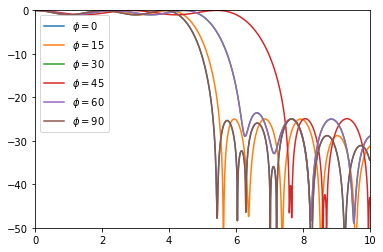

In [12]:
if Table_1:
    F_k_loaded = aux
    
else:
    F_k_loaded = np.loadtxt('Table_F_k_real_100.txt', dtype = 'complex')

nf, nc = np.shape(F_k_loaded)
aux = int((nf - 1) / 2)

def F_k_comprobation(phi):
    F_de_ns = 0

    for k in np.arange(- aux, aux + 1):
        F_de_ns += F_k_loaded[k + aux, :] * np.exp(1j * k * phi)

    F_de_ns = pass_to_dB(np.abs(F_de_ns))
    plt.plot(c, F_de_ns, label = u'$\phi = %.f$' %degrees(phi))
    plt.legend(loc = 'best')
    plt.ylim(-50, 0)
    plt.xlim(0, 10)
    #plt.show()

F_k_comprobation(radians(0))
F_k_comprobation(radians(15))
F_k_comprobation(radians(30))
F_k_comprobation(radians(45))
F_k_comprobation(radians(60))
F_k_comprobation(radians(90))

## Límites nas sumas

In [13]:
max_in_sum_1 = 100
max_in_sum_2 = 100

## Zeros de Bessel

In [14]:
rows = 2 * max_in_sum_2 + 1
columns = max_in_sum_1 + 1

Bessel_zeros = np.zeros((max_in_sum_2 + 1, columns))

for k in range(max_in_sum_2 + 1):
    Bessel_zeros[k, 1:max_in_sum_1 + 1] = sc.special.jn_zeros(k, max_in_sum_1) / np.pi

## Táboas de $g_n(p)$

In [15]:
Table_2 = False

if Table_2:
    aux = np.zeros((rows, columns), dtype = 'complex')
    
    for k in np.arange(- max_in_sum_2, max_in_sum_2 + 1):
        
        if k == 0:
            gamma_nm = Bessel_zeros[1, :]
        else:
            gamma_nm = Bessel_zeros[np.abs(k), :]
        
        for zero in range(columns):
            if gamma_nm[zero] in Bessel_zeros[1, :]:
                gamma_nm[zero] += 1e-10
            
            aux[k + max_in_sum_2, zero] = F_k(k, gamma_nm[zero])
    
    np.savetxt('Table_F_n' + _type_ + str(max_in_sum_1) + '_' + str(max_in_sum_2) + '.txt', aux)

## Calculamos $g_n(p)$

In [16]:
if Table_2:
    F_k_loaded = aux
    
else:
    F_k_loaded = np.loadtxt('Table_F_n_real_100_100.txt', dtype = 'complex')

def g_n(k, p): # Para todo n.
    aux = 0
    
    if k == 0:
        for m in np.arange(0, max_in_sum_1):
            gamma_1m = Bessel_zeros[1, m]
            aux += (F_k_loaded[max_in_sum_2, m] * sc.special.jv(0, gamma_1m * p)) / (sc.special.jv(0, gamma_1m * np.pi))**2 
    
    else:
        for m in np.arange(1, max_in_sum_1):
            gamma_nm = Bessel_zeros[np.abs(k), m]
            aux -= (F_k_loaded[k + max_in_sum_2, m] * sc.special.jv(k, gamma_nm * p)) / (sc.special.jv(k - 1, gamma_nm * np.pi) * sc.special.jv(k + 1, gamma_nm * np.pi))
        
    return 2 * aux / np.pi**2

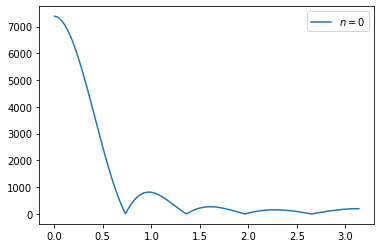

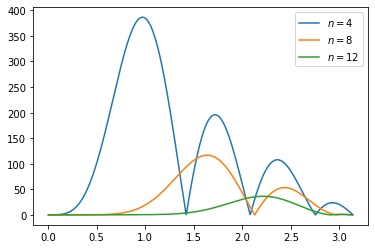

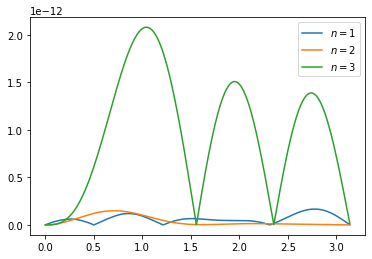

In [17]:
d = c * np.pi / a

plt.plot(d, np.abs(g_n(0, d)), label = u'$n = %.f$' %0)
plt.legend(loc = 'best')

plt.show()

for k in [4, 8, 12]:
    plt.plot(d, np.abs(g_n(k, d)), label = u'$n = %.f$' %k)
    plt.legend(loc = 'best')

plt.show()

for k in [1, 2, 3]:
    plt.plot(d, np.abs(g_n(k, d)), label = u'$n = %.f$' %k)
    plt.legend(loc = 'best')

plt.show()

## Calculamos $K_n(\rho)$

In [18]:
def K_n(k, p):
    return g_n(k, np.pi * p / a) * np.pi / (2 * a**2 * (1j)**k)

## Calculamos $K(\rho, \beta)$

In [19]:
def K_rho_beta(p, beta): # K_6_45
    aux = 0 + 1j*0
    
    for k in np.arange(- max_in_sum_2, max_in_sum_2 + 1):
        aux += K_n(k, p) * np.exp(1j * k * beta)
    
    return aux

Levamos a cabo unha representación da apertura.

In [20]:
def subplot(beta_1, beta_2, function):
    aux_1 = function(rho_a * a, beta_1)
    aux_2 = function(rho_a * a, beta_2)
    
    fig, ax = plt.subplots(2, 2)
    ax[0, 0].plot(rho_a, np.abs(aux_1))
    ax[0, 1].plot(rho_a, np.abs(aux_2))

    ax[1, 0].plot(rho_a, np.angle(aux_1))
    ax[1, 1].plot(rho_a, np.angle(aux_2))
    fig.tight_layout()
    plt.show()

subplot(radians(180), radians(0), K_rho_beta)
subplot(radians(210), radians(30), K_rho_beta)
subplot(radians(240), radians(60), K_rho_beta)
subplot(radians(270), radians(90), K_rho_beta)

Facemos unha representación 3D de $K(\rho, \beta)$.

In [ ]:
x = np.arange(- 1, 1, 0.01); x = np.delete(x, np.where(x == 0))
X_plot, Y_plot = np.meshgrid(x, x)

N = len(x)
N_square = N * N

rho = np.sqrt(X_plot**2 + Y_plot**2) * a
beta = np.arctan2(Y_plot, X_plot)

rho = np.reshape(rho, (N_square))
beta = np.reshape(beta, (N_square))

K_plot = np.abs(K_rho_beta(rho, beta))

K_plot = np.reshape(K_plot, (N, N))
np.savetxt('Data' + _type_ + 'K_rho_beta.txt', K_plot)

In [ ]:
fig = plt.figure(1)
plt.imshow(K_plot)
plt.title(r'$K(\rho, \beta)$')
plt.savefig('Horizontal' + _type_ + 'K_rho_beta.png', dpi = 300)

fig = plt.figure(2)
ax = plt.axes(projection = '3d')
ax.plot_surface(X_plot, Y_plot, K_plot, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
ax.set_visible(True)
plt.title(r'$K(\rho, \beta)$')
plt.savefig('3D_' + _type_ + 'K_rho_beta.png', dpi = 300)
ax.view_init(50, 50)

## Discretizamos

Como facer a integral é moi lento discretizamos a antena. Podémolo facer por rectángulos ou círculos.

In [20]:
espaciado = 0.1 # Cambiar a 0.1.
I_mn = []
I_x = []
I_y = []
counter = 0

if _grid_ == 'Rectangular':
    limit = (np.int(a / espaciado) + 0.5) * espaciado
    
    for y in np.arange(- limit, limit + 1, espaciado):
        counter += 1
        print('{:.1%}'.format(counter / (2 * (limit / espaciado) + 1)))
        
        for x in np.arange(- limit, limit + 1, espaciado):
            r_ij = np.sqrt(x**2 + y**2) 
            
            if r_ij <= a:
                beta_ij = np.arctan2(y, x)
                aux = K_rho_beta(r_ij, beta_ij)
                I_mn.append(aux)
                I_x.append(x)
                I_y.append(y)

elif _grid_ == 'Circular':
    N_aros = np.int(a / espaciado)
    
    for i in range(N_aros):
        print('{:.1%}'.format(i / N_aros))
        r_ij = (i + 0.5) * espaciado
        N_elementos_aro = np.int(2 * np.pi * r_ij / espaciado)
        
        for j in range(N_elementos_aro):
            beta_ij = j * 2 * np.pi / N_elementos_aro
            aux = K_rho_beta(r_ij, beta_ij)
            I_mn.append(aux)
            I_x.append(r_ij * np.cos(beta_ij))
            I_y.append(r_ij * np.sin(beta_ij))

print('{:.0%}'.format(1))
I_mn /= np.max(I_mn)

0.5%
1.0%
1.5%
2.0%
2.5%
3.0%
3.5%
4.0%
4.5%
5.0%
5.4%
5.9%
6.4%
6.9%
7.4%
7.9%
8.4%
8.9%
9.4%
9.9%
10.4%
10.9%
11.4%
11.9%
12.4%
12.9%
13.4%
13.9%
14.4%
14.9%
15.3%
15.8%
16.3%
16.8%
17.3%
17.8%
18.3%
18.8%
19.3%
19.8%
20.3%
20.8%
21.3%
21.8%
22.3%
22.8%
23.3%
23.8%
24.3%
24.8%
25.2%
25.7%
26.2%
26.7%
27.2%
27.7%
28.2%
28.7%
29.2%
29.7%
30.2%
30.7%
31.2%
31.7%
32.2%
32.7%
33.2%
33.7%
34.2%
34.7%
35.1%
35.6%
36.1%
36.6%
37.1%
37.6%
38.1%
38.6%
39.1%
39.6%
40.1%
40.6%
41.1%
41.6%
42.1%
42.6%
43.1%
43.6%
44.1%
44.6%
45.0%
45.5%
46.0%
46.5%
47.0%
47.5%
48.0%
48.5%
49.0%
49.5%
50.0%
50.5%
51.0%
51.5%
52.0%
52.5%
53.0%
53.5%
54.0%
54.5%
55.0%
55.4%
55.9%
56.4%
56.9%
57.4%
57.9%
58.4%
58.9%
59.4%
59.9%
60.4%
60.9%
61.4%
61.9%
62.4%
62.9%
63.4%
63.9%
64.4%
64.9%
65.3%
65.8%
66.3%
66.8%
67.3%
67.8%
68.3%
68.8%
69.3%
69.8%
70.3%
70.8%
71.3%
71.8%
72.3%
72.8%
73.3%
73.8%
74.3%
74.8%
75.2%
75.7%
76.2%
76.7%
77.2%
77.7%
78.2%
78.7%
79.2%
79.7%
80.2%
80.7%
81.2%
81.7%
82.2%
82.7%
83.2%
83.7%
84.2%


In [21]:
if False:
    u = np.linspace(-1, 1, 361)
    v = np.linspace(-1, 1, 361)
    
    F = np.zeros((len(u),len(v)), dtype = 'complex')

    for i in range(len(u)):
        for j in range(len(v)):
            for k in range(len(I_mn)):
                arg_exp = 2 * np.pi * (I_x[k] * u[i] + I_y[n] * v[j])
                F[i, j] += I_mn[k] * np.exp(1j * arg_exp)

## Calculamos $F(\theta, \phi)$

In [21]:
def F_theta_phi(Theta, Phi):
    aux_2 = 0 + 1j*0
    
    for k in range(len(I_mn)):
        aux = np.sin(Theta) * (I_x[k] * np.cos(Phi) + I_y[k] * np.sin(Phi))
        aux_2 += I_mn[k] * np.exp(1j * 2 * np.pi * aux)
        
    return aux_2

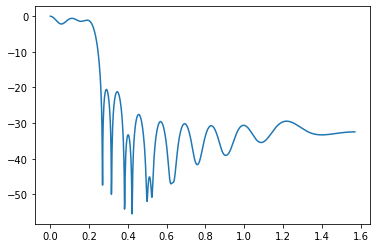

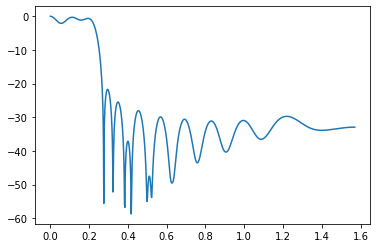

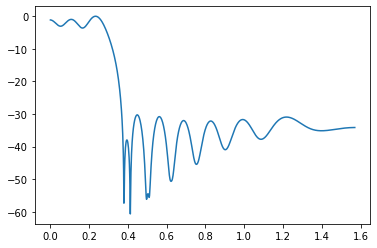

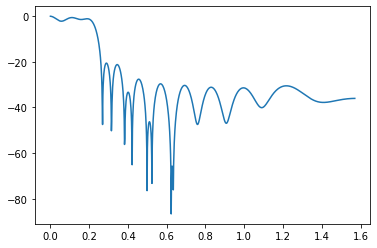

In [27]:
def plot_aux(Phi):
    bla = len(c_angle)
    _f_ = np.zeros(bla)
    
    for i in range(bla):
        _f_[i] = np.abs(F_theta_phi(c_angle[i], Phi))
    
    _f_ = 2 * pass_to_dB(_f_)
    plt.plot(c_angle, _f_)
    plt.show()

c_angle = rho_a * np.pi / 2
plot_aux(radians(0))
plot_aux(radians(15))
plot_aux(radians(45))
plot_aux(radians(90))

In [22]:
F_plot = np.abs(F_theta_phi(Theta, Phi))
F_plot = 2 * pass_to_dB(F_plot)
clear_around(F_plot)

new_N = int(np.sqrt(len(F_plot)))
F_plot = np.reshape(F_plot, (new_N, new_N))
np.savetxt('Data' + _type_ + 'F_theta_phi.txt', F_plot)

x = np.linspace(-np.pi / 2, np.pi / 2, new_N)
X_plot, Y_plot = np.meshgrid(x, x)

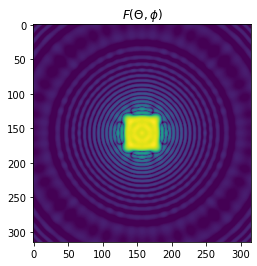

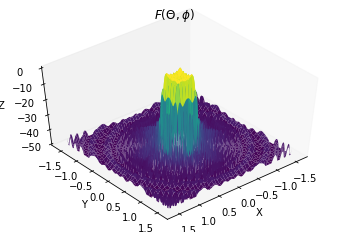

In [23]:
fig = plt.figure(1)
plt.imshow(F_plot)
plt.title('$F(\Theta, \phi)$')
plt.savefig('Horizontal' + _type_ + 'F_theta_phi.png', dpi = 300)

fig = plt.figure(2)
ax = plt.axes(projection = '3d')
ax.plot_surface(X_plot, Y_plot, F_plot, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
ax.set_visible(True)
ax.set_zlim(-50, 0)
plt.title('$F(\Theta, \phi)$')
plt.savefig('3D' + _type_ + 'F_theta_phi.png', dpi = 300)
ax.view_init(50, 50)

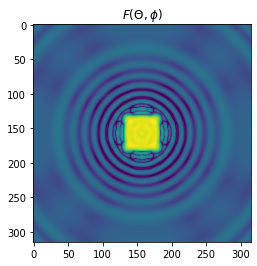

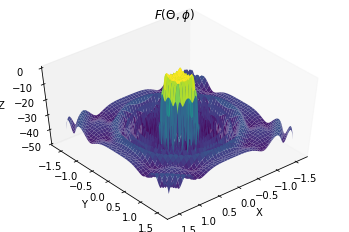

In [25]:
fig = plt.figure(1)
plt.imshow(F_plot)
plt.title('$F(\Theta, \phi)$')
plt.savefig('Horizontal' + _type_ + 'F_theta_phi.png', dpi = 300)

fig = plt.figure(2)
ax = plt.axes(projection = '3d')
ax.plot_surface(X_plot, Y_plot, F_plot, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
ax.set_visible(True)
ax.set_zlim(-50, 0)
plt.title('$F(\Theta, \phi)$')
plt.savefig('3D' + _type_ + 'F_theta_phi.png', dpi = 300)
ax.view_init(50, 50)

Aquí facemos directamente a integral.

In [27]:
def F(theta, phi):    
    def integral_function(x, y): return x * K_rho_beta(x, y) * np.exp(- 1j * k * x * np.sin(theta) * np.cos(phi - y))
    def real_integral_function(x, y): return np.real(integral_function(x, y))
    def imaginary_integral_function(x, y): return np.imag(integral_function(x, y))

    real_integral = dblquad(real_integral_function, 0, a, lambda y: 0, lambda y: 2 * np.pi)
    imag_integral = dblquad(imaginary_integral_function, 0, a, lambda y: 0, lambda y: 2 * np.pi)
    
    return 0.5 * (real_integral[0] + 1j*imag_integral[0]) / np.pi

In [ ]:
for i in range(N_square):
    _F_ = np.abs(F(Theta[i], Phi[i]))

In [ ]:
Z_plot = np.abs(_F_)
Z_plot = pass_to_dB(Z_plot)
clear_around(Z_plot)
Z_plot = np.reshape(Z_plot, (N, N))

In [ ]:
plt.imshow(Z_plot)
plt.show()
    
ax = plt.axes(projection = '3d')
ax.plot_surface(X_plot, Y_plot, Z_plot, cmap = 'viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(False)
ax.set_visible(True)
ax.set_zlim(-50, 0)
ax.view_init(50, 50)
plt.show()

In [27]:
print('Total execution time is:', np.round(time.perf_counter() - t0, 2), 's')

Total execution time is: 30915.84 s
